# Генерация экспоненциального распределения и проверка ЦПТ


1. Импорт необходимых библиотек

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

2. Генерация распределения

In [53]:
d = sts.expon()

r = d.rvs(size=1000)

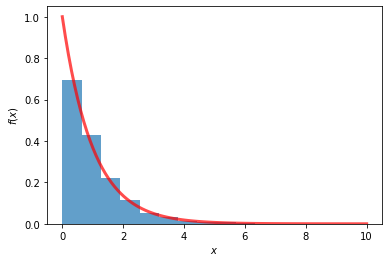

In [54]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 10, 100)
ax.plot(x, sts.expon.pdf(x), 'r-', lw=3, alpha=0.7)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.7)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

## выборочные средние.



In [58]:
def generate_pdf(n):
    means = []
    # Генерация выборок
    for _ in range(1000):
        sample = d.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    # теоритеческую плотность вероятности нормального распределения
    mu = 1
    sigma = (1/n) ** 0.5
    norm_d = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_d.pdf(x)

    plt.plot(x, pdf, linewidth=2)
    plt.hist(means, density=True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

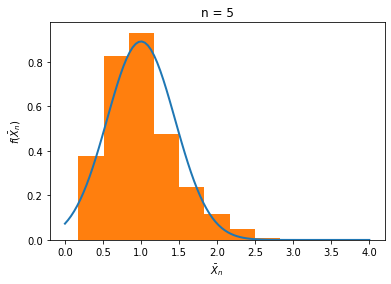

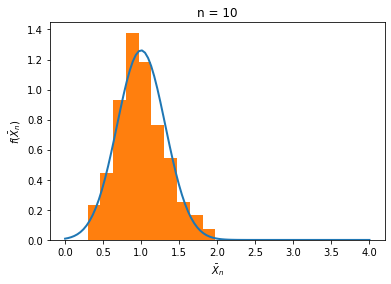

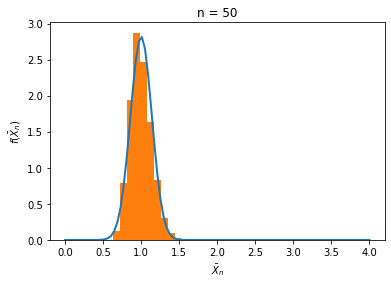

In [59]:
n = [5, 10, 50]
for i in n:
    generate_pdf(i)


## Вывод

при n=5 распределение несимметрично, при увеличении n до 50 становится все более заметна схожесть с нормальным распределением и наблюдается уменьшение разброса